## **Optimalisasi Transjakarta :**
## **Analisis Skema Wacana Kenaikan Tarif Transjakarta**
---

## **Pendahuluan**

### **Latar Belakang**

Transjakarta diresmikan pada 15 Januari 2004 pada era Gubernur Sutiyoso. Transjakarta tercatat sebagai sistem *Bus Rapid Transit* (BRT) pertama di Asia Tenggara dan Selatan. Dalam dua dekade perjalanannya, Transjakarta telah berkembang pesat menjadi sistem BRT dengan lintasan terpanjang di dunia, melayani jutaan penumpang setiap harinya melalui ekosistem yang terintegrasi, mulai dari bus besar di koridor utama hingga angkutan mikro (Mikrotrans/JakLingko) yang menjangkau pemukiman padat.

Sejak awal beroperasi hingga saat ini, tarif dasar Transjakarta dipatok sebesar Rp3.500, sebuah angka yang tetap bertahan meskipun terjadi fluktuasi harga bahan bakar, inflasi ekonomi, dan peningkatan Upah Minimum Provinsi (UMP) selama 20 tahun terakhir. Stabilitas tarif ini menjadikan Transjakarta sebagai jaring pengaman sosial yang krusial bagi mobilitas warga, namun di sisi lain menciptakan kesenjangan (gap) yang semakin lebar antara pendapatan tiket dan biaya operasional riil. Hal ini menjadikan beban subsidi semakin memberatkan Anggaran Pendapatan dan Belanja Daerah (APBD), Pemerintah Provinsi DKI Jakarta, sehingga pada akhir tahun 2025 mulai diadakan [wacana penyesuaian tarif](https://www.tempo.co/politik/pramono-ungkap-usulan-tarif-transjakarta-naik-jadi-rp-5-000-hingga-rp-7-000-2084444) yang signifikan menjadi Rp5.000.

Meskipun kenaikan ini dinilai logis secara ekonomi, penerapannya menghadapi tantangan sosial yang besar. [Masyarakat menuntut](https://www.antaranews.com/berita/5251841/kenaikan-tarif-transjakarta-diimbau-berbasis-peningkatan-layanan) agar kenaikan harga dibarengi dengan peningkatan kualitas layanan, ketepatan waktu, dan kenyamanan armada. Oleh karena itu, diperlukan analisis berbasis data untuk merumuskan strategi yang meminimalkan gejolak resistensi publik.

### **Fokus Analisis**
Bagaimana merancang skema penyesuaian tarif Transjakarta yang mampu menyeimbangkan target peningkatan pendapatan perusahaan dengan daya beli masyarakat, serta skema manakah (Flat, Peak Hour, atau Demografis) yang memberikan dampak paling efisien?

### **Tujuan Analisis**
Analisis ini bertujuan untuk mengevaluasi tiga skenario kebijakan tarif menggunakan [data Transjakarta](https://drive.google.com/drive/folders/1S04hk5uHfHYe6J1S6fVqDunuja1Lk1Lo), dengan rincian sebagai berikut:
1. Kenaikan tarif flat / secara keseluruhan,
2. Kenaikan tarif berbasis Rush Hour,
3. Kenaikan tarif berbasis profil demografis.
Serta memberi rekomendasi kebijakan strategis berdasarkan ketiga skenario diatas.

## **Data Preparation**

### Import Library and Read Data

In [183]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chisquare
from statsmodels.stats.proportion import proportions_ztest

import warnings
warnings.filterwarnings("ignore")

membaca data Transjakarta dan menampilkan 5 baris data pertama serta 5 baris data terakhir

In [184]:
#masukkan file yang akan dianalisis
from google.colab import files
uploaded = files.upload()

In [185]:
# Coba periksa semua kunci yang ada di kamus uploaded
print(uploaded.keys())

dict_keys(['Transjakarta (1).csv'])


In [186]:
#masukkan kunci di atas sebagai nama file csv
df = pd.read_csv(io.BytesIO(uploaded['Transjakarta (1).csv']))

In [187]:
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


### **Data Understanding**

Mengecek ukuran dataset serta format type data pada setiap kolom

In [188]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (37900, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-nul

Dataset Transjakarta memiliki 22 kolom informasi dan 37900 baris, dengan rincian sebagai berikut:

| Nama Kolom        | Deskripsi                                                       |
|-------------------|------------------------------------------------------------------|
| `TransID`           | ID transaksi unik untuk setiap transaksi                        |
| `PayCardID`         | ID kartu pelanggan dari kartu yang digunakan pelanggan sebagai tiket untuk masuk dan keluar |
| `PayCardBank`       | Nama bank penerbit kartu pelanggan                               |
| `PayCardName`       | Nama pelanggan yang tertera pada kartu                           |
| `PayCardSex`        | Jenis kelamin pelanggan yang tertera pada kartu                  |
| `PayCardBirthDate`  | Tahun kelahiran pelanggan                                        |
| `CorridorID`        | ID koridor dari perjalanan yang ditempuh pelanggan |
| `CorridorName`      | Nama koridor yang mencakup titik awal dan akhir dari setiap rute |
| `Direction`         | Arah rute perjalanan. 0 untuk Pergi, 1 untuk Kembali                       |
| `TapInStops`        | ID halte tap-in (masuk) untuk mengidentifikasi nama halte       |
| `TapInStopsName`    | Nama halte tap-in (masuk) tempat pelanggan melakukan tap-in      |
| `TapInStopsLat`     | Lintang dari halte tap-in (masuk)                               |
| `TapInStopsLon`     | Bujur dari halte tap-in (masuk)                                 |
| `StopStartSeq`      | Urutan halte, halte pertama, kedua, dan seterusnya. Terkait dengan arah |
| `TapInTime`         | Waktu saat tap-in (masuk). Tanggal dan waktu                             |
| `TapOutStops`       | ID halte tap-out (keluar) untuk mengidentifikasi nama halte     |
| `TapOutStopsName`   | Nama halte tap-out (keluar) tempat pelanggan melakukan tap-out  |
| `TapOutStopsLat`    | Lintang dari halte tap-out (keluar)                              |
| `TapOutStopsLon`    | Bujur dari halte tap-out (keluar)                                |
| `StopEndSeq`        | Urutan halte, halte pertama, kedua, dan seterusnya. Terkait dengan arah |
| `TapOutTime`        | Waktu saat tap-out (keluar). Tanggal dan waktu                            |
| `PayAmount`         | Jumlah yang dibayar pelanggan. Beberapa gratis, beberapa tidak  |


#### **Missing Value dan Duplikat**

Cek duplikat yang ada dalam data

In [189]:
print(f"Total baris duplikat yang ditemukan: {df.duplicated().sum()} baris.")

Total baris duplikat yang ditemukan: 0 baris.


Menampilkan count missing value dan persentase missing value terhadap total data pada masing-masing kolom

In [190]:
df_null=pd.DataFrame(df.isna().sum()).reset_index().rename(columns={'index':'Column',0:'Count Missing'})
df_null['Percentage Missing']=(round(100*df.isna().sum()/len(df),2)).reset_index(drop=True)
df_null

,Column,Count Missing,Percentage Missing
0,transID,0,0.00
1,payCardID,0,0.00
2,payCardBank,0,0.00
3,payCardName,0,0.00
4,payCardSex,0,0.00
5,payCardBirthDate,0,0.00
6,corridorID,1257,3.32
7,corridorName,1930,5.09
8,direction,0,0.00
9,tapInStops,1213,3.20


Melihat sebaran missing value dalam data

<Axes: >

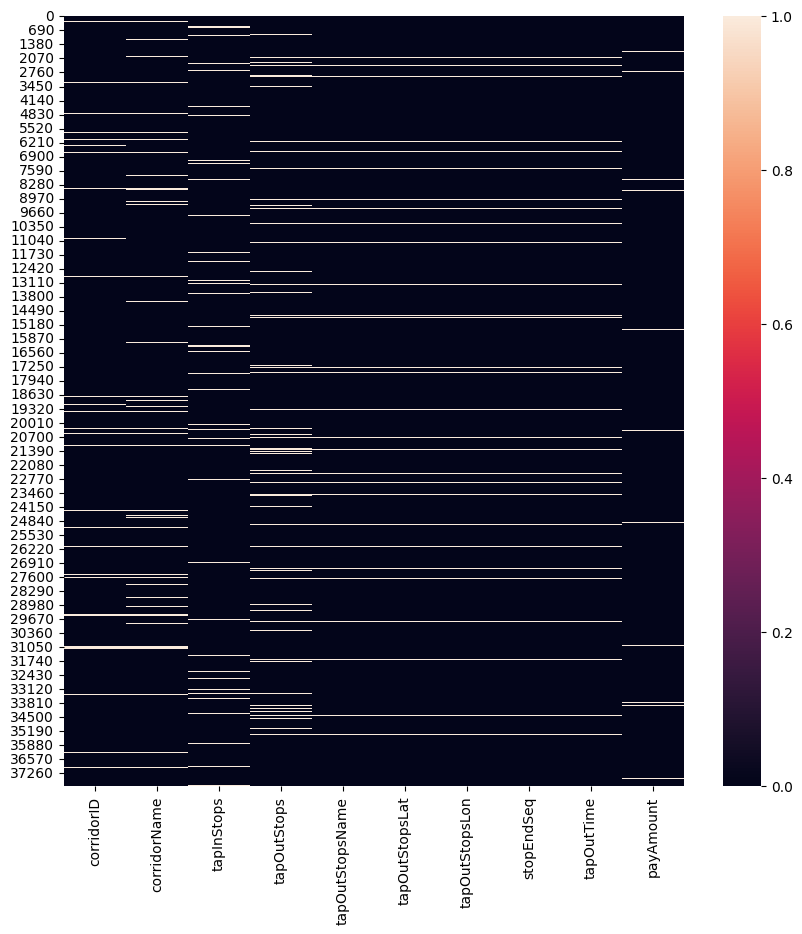

In [191]:
plt.figure(figsize=(10,10))
sns.heatmap(df[['corridorID','corridorName','tapInStops','tapOutStops','tapOutStopsName','tapOutStopsLat','tapOutStopsLon','stopEndSeq','tapOutTime','payAmount']].isna())

menampilkan baris yang berisi minimal 1 missing value

In [192]:
# df[df.isna().any(axis=1)]

### **Data Cleaning**

Secara garis besar:  
* *missing value* di kolom `corridorName` dan `tapOutStops` memiliki proporsi yang cukup tinggi (>5%)
* *missing value* di kolom `tapOutStops`,`tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`,`stopEndSeq` dan `tapOutTime` memiliki sebaran yang terlihat berkaitan, jika data di `tapOutStopsName` kosong, maka data di `tapOutStopsLat`, `tapOutStopsLon`,`stopEndSeq` dan `tapOutTime` juga kosong.  

Ada 2 cara untuk menangani *missing value*:
* pertama, menghapus baris/kolom yang berisi *missing value*.
* kedua, mengisi data yang hilang. Cara ini lebih disarankan. Ada beberapa metode yang bisa digunakan untuk mengisi missing value, cara yang paling baik adalah dengan mengisi data yang hilang dengan nilai sebenarnya, atau sedekat mungkin dengan nilai asli. Dalam kasus ini, kita akan mencoba mengisi *missing value* berdasarkan kolom lain yang secara domain knowledge atau secara statistik berkaitan dengan kolom yang memiliki *missing value*. Jika masih ada kolom yang tidak bisa diisi, barulah kita mengisi dengan angka *mean, median* atau *modus* jika memungkinkan.


Handling missing value di kolom `corridorName` menggunakan domain knowledge dari kolom `corridorID`
- dari 1930 data missing value , setelah dilakukan handling berkurang menjadi 1125 data missing value

In [193]:
corridor=df.groupby('corridorID')['corridorName'].apply(lambda x: x.mode()[0] if len(x.mode()) > 0 else np.nan).reset_index()
corridor_mapping=dict(zip(corridor['corridorID'], corridor['corridorName']))
df['corridorName'] = df.apply(
    lambda row: corridor_mapping[row['corridorID']]
    if pd.isnull(row['corridorName']) and pd.notnull(row['corridorID'])
    else row['corridorName'],
    axis=1
)
df['corridorName'].isnull().sum()

np.int64(1125)

Handling missing value di kolom `tapInStops` menggunakan domain knowledge dari kolom `tapInStopsName`
- dari 1213 missing value data, setelah dilakukan handling berkurang menjadi 34 missing value data

In [194]:
tapIn = df.groupby('tapInStopsName')['tapInStops'].apply(lambda x: x.mode()[0] if len(x.mode()) > 0 else np.nan).reset_index()
tapInStops_mapping = dict(zip(tapIn['tapInStopsName'], tapIn['tapInStops']))
df['tapInStops'] = df.apply(
    lambda row: tapInStops_mapping[row['tapInStopsName']]
    if pd.isnull(row['tapInStops']) and pd.notnull(row['tapInStopsName'])
    else row['tapInStops'],
    axis=1
)
df['tapInStops'].isnull().sum()

np.int64(34)

Handling missing value di kolom `tapOutStops` menggunakan domain knowledge dari kolom `tapOutStopsName`
- dari 2289 missing value data, setelah dilakukan handling berkurang menjadi 1363 missing value data

In [195]:
tapOut = df.groupby('tapOutStopsName')['tapOutStops'].apply(lambda x: x.mode()[0] if len(x.mode()) > 0 else np.nan).reset_index()
tapOutStops_mapping = dict(zip(tapOut['tapOutStopsName'], tapOut['tapOutStops']))
df['tapOutStops'] = df.apply(
    lambda row: tapOutStops_mapping[row['tapOutStopsName']]
    if pd.isnull(row['tapOutStops']) and pd.notnull(row['tapOutStopsName'])
    else row['tapOutStops'],
    axis=1
)
df['tapOutStops'].isnull().sum()

np.int64(1363)

Handling missing value pada kolom `payAmount`.
Dari tabel dibawah, diketahui:
- koridor transjakarta M7B, M1H, dan 3H memiliki missing value
- Jaklingko JAK.48A dan JAK.48B memiliki missing value

In [196]:
df[df['payAmount'].isna()]['corridorID'].value_counts()

,count
corridorID,
M7B,309
JAK.48A,248
M1H,170
JAK.48B,159
3H,90


missing value pada koridor transjakarta --> `payAmount` = 3500

missing value pada koridor Jaklingko --> `payAmount` = 0
- dari 1007 missing value data, setelah dilakukan handling berkurang menjadi 0 missing value data


In [197]:
df.loc[df['corridorID'].str.startswith('JAK', na=False), 'payAmount'] = 0
df['payAmount'].fillna(3500, inplace=True)
df['payAmount'].isnull().sum()

np.int64(0)

Cek kembali missing value yang ada di setiap tabel

In [198]:
df_null=pd.DataFrame(round(100*df.isna().sum()/len(df),2)).reset_index().rename(columns={'index':'Column',0:'Percentage Missing'})
df_null['Count Missing']=df.isna().sum().reset_index(drop=True)
df_null

,Column,Percentage Missing,Count Missing
0,transID,0.00,0
1,payCardID,0.00,0
2,payCardBank,0.00,0
3,payCardName,0.00,0
4,payCardSex,0.00,0
5,payCardBirthDate,0.00,0
6,corridorID,3.32,1257
7,corridorName,2.97,1125
8,direction,0.00,0
9,tapInStops,0.09,34


<Axes: >

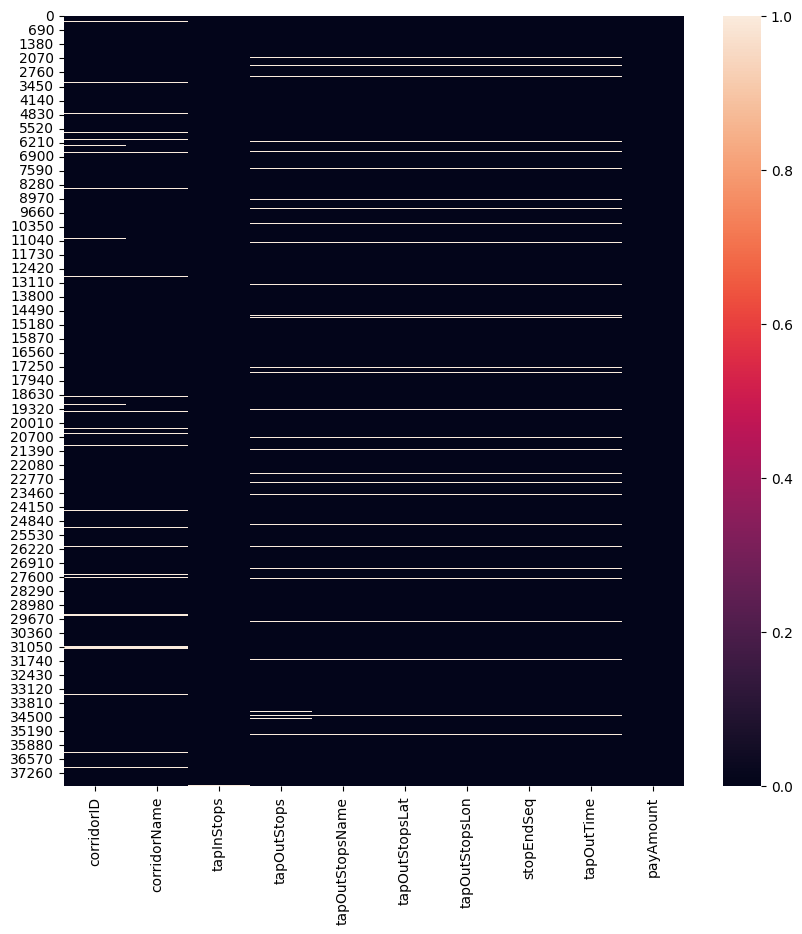

In [199]:
plt.figure(figsize=(10,10))
sns.heatmap(df[['corridorID','corridorName','tapInStops','tapOutStops','tapOutStopsName','tapOutStopsLat','tapOutStopsLon','stopEndSeq','tapOutTime','payAmount']].isna())

dari kedua informasi diatas, didapatkan kolom yang masih memiliki missing value yang saling berhubungan
- `corridorID` dan `corridorName`
- `tapInStops`
- `tapOutStops`, `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`, `stopEndSeq`, dan `tapOutTime`

Handling missing value yang dapat dilakukan adalah dengan menghapus data tersebut, karena tidak memungkinkan untuk mengisi data dengan mean, median ataupun modus


In [200]:
df.dropna(subset=['corridorID','corridorName','tapInStops','tapOutStops','tapOutStopsName','tapOutStopsLat','tapOutStopsLon','stopEndSeq','tapOutTime'], inplace=True)

Data yang sudah dibersihkan dan siap dianalisis sebanyak 35.301 baris dari 37.900 baris

In [201]:
df.shape

(35301, 22)

*   Format data `tapInTime` dan `tapOutTime` yang awalnya object diubah menjadi date time
*   Format data `direction` diubah menjadi object, karena informasi menunjukkan arah
*   Format data `stopEndSeq` dan `stopStartSeq`diubah menjadi object, karena informasi menunjukkan urutan halte pada suatu koridor







In [202]:
df['tapInTime'] = pd.to_datetime(df['tapInTime'], errors='coerce')
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])
df['payCardID'] = df['payCardID'].astype('object')
df['direction'] = df['direction'].astype('object')
df['stopEndSeq'] = df['stopEndSeq'].astype('object')
df['stopStartSeq'] = df['stopStartSeq'].astype('object')

Menyimpan data Transjakarta yang sudah dibersihkan ke dalam file Excel

In [203]:
# file_name = 'Transjakarta_clean.xlsx'
# df.to_excel(file_name, index=False)

#### **Descriptive Analysis**

Menampilkan kolom, jumlah data unik dalam kolom, tipe kolom beserta isi dari masing-masing kolom

In [204]:
df_unique = []

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

for i in df.columns:
    unique_count = df[i].nunique()
    unique_values = df[i].unique()
    data_type = df[i].dtype
    df_unique.append({
        "Column Name": i,
        "Number of Unique": unique_count,
        "Data Type": data_type,
        "Unique Sample": unique_values
    })

df_unique = pd.DataFrame(df_unique)
display(df_unique)

,Column Name,Number of Unique,Data Type,Unique Sample
0,transID,35301,object,"[EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57TO, JTUZ800U7C86EH, VMLO535V7F95NJ, DDES630K2F80KC, OIHS248V7S72EB, ERXO372B2H63RB, CLWK627W2M22WO, IIEK980X1O23NZ, OPLW560U3S06UG, XESX233R4U46DN, LZFD368Q3E81HJ, KLUN542I2F21PI, XDMP644Z5Y29DB, CUPO258C0D42PY, SBPQ144H4S45RA, ZYRL615G4C05RD, MEFW094B7A84RS, ZJVI960B9I42DA, RJPK085I1K65HR, TFIO518N2X54UT, SYLN486U0E02TA, BECP746A8C28NV, KYNP204W3G29VA, MSFD430X8W13TO, MKND874X1D96HF, LFYJ535S2I30DP, KQIA358G2N38CX, RANO576G1J87EO, NZCE828E4J23AW, OFPJ170M5O75AP, LKXU174O1E59EP, AXTN077R7Z77JM, WQXL397G5U61OY, RLLZ887W3V14WZ, JJEK861K6E37KF, UANX737M9L25GI, VUWZ891M7I57EB, CXLW459Z3A28RD, AQPU510X2X44PT, BRUT293K1O98GA, MMEX885R3T18QL, UNFK619O2R74DX, FTGY161E2O14MG, ELVU605Z3W26IF, KPDA909R2T72GD, GIHF067H1Y81IV, IXJW013G5W79VX, PKAM574R5S22UG, IQBJ843C4G34DE, SRIX686S0S08SW, MLTY652D7F29HW, NICD824U6H93DE, YEOK544W1J67OX, OPNL705D9K64FN, KHKM512K0T88LD, RHUT145C1U25ZY, TWAK265Z0M88QR, JQIF022K9P74RM, MQCN972F9X71NY, KINJ335N6L86YT, TDIY341Y5S79UU, TFRA396G6W78PD, GXOP506G9B61EP, XESL868N6A66XN, IVHH403J9T51JH, YJMS457L2O20JF, NNAE999Q4V92XM, UCMI767D7M79GS, ZHFN555D9L05LU, WHTZ386I9S44YF, VHUC320U1S58CB, DBWI728C0M55ND, HHCJ093F0W41XK, JUNS207R4F95UA, LFIW578V8Y12XO, GYVC538M6B25WO, QRFR658M6P01AH, TKQW976R2D32RY, PCGM443G2W62OB, PEGV120E5W96OH, BUQT197K3D65PN, UNSO267V8F26WP, RHCN069U6G42WD, QMHC825R0K38KM, WGRY331M3O87VE, TKRV681O2S46RW, ELFD362R2U94NT, YYXK265F5N59SE, ZGJG301G9Z71AR, KNSE319Q1P35CC, RMJF585F2W51BQ, KFYK655N1H73XS, WTBE175B2A58NC, SVRH922T8G79FY, WNJA365V4N56HF, XVWU715D9V59FV, SLHT241M5V31BZ, CUBV879R6E17WU, ...]"
1,payCardID,1975,object,"[180062659848800, 4885331907664776, 4996225095064169, 639099174703, 570928206772, 2251412124634980, 6510013988638519, 3580401035990896, 5541851157087967, 347204308990092, 3536759468239783, 6575130739600630, 4056836188316, 4532407180860336, 4556326832434362836, 4969284110642, 502034641014, 5430018591726410, 378872365541693, 343851798729291, 676293109036, 213191293100137, 2295833910329055, 4968156435384914, 676367323901, 4384653483539395, 213155309116759, 4682220924642, 4394677357168120, 4905734029265594, 379334845079777, 346910704516122, 2247096843683316, 675990206087, 639040388584, 4947438345710982, 3539535695881465, 574726750023, 344303671677311, 3544931989278653, 4017802962833960, 5465310774429054, 347394043585982, 4723250872219869, 3545499820365948, 2718070346782735, 342531623551844, 349944373495091, 4428582927102421723, 566171543168, 213121690546749, 3527853482331808, 5542490449138301, 4380875529452127, 4172238784006231, 340065298083181, 4268640600849949, 4290559479079, 213155263532652, 4294484188649274, 180057903365395, 3551174827324245, 340858239719917, 3569562588766630, 180016859215889, 373945281501952, 5134532253940704, 379764016867073, 4189640459822695962, 4766007569419196, 3576239635494729, 587887634588, 567286069354, 4097122165824, 378851219912235, 180022972730457, 2237440645700724, 6011162006507240, 4730280883020443501, 3505707886664931, 4450403105752326, 4074114259011835374, 4000041838802, 4112330548313, 30583455954585, 3537543297101185, 2720484776954605, 3570422408611549, 2291402671071407, 676172975739, 180020791350481, 502072062834, 30385017224303, 6590854673757012, 4963710913075879668, 213104805015669, 342875882384375, 4744480387450088900, 4909284437358495207, 2267435685058176, ...]"
2,payCardBank,6,object,"[emoney, dki, flazz, online, brizzi, bni]"
3,payCardName,1968,object,"[Bajragin Usada, Gandi Widodo, Emong Wastuti, Surya Wacana, Embuh Mardhiyah, Tirta Siregar, Cagak Maheswara, S.Sos, T. Dadap Pradana, M.Ak, Oskar Widiastuti, S.Farm, R.M. Labuh Laksmiwati, Shakila Maryadi, Danuja Usada, Nadine Utami, H. Lutfan Nurdiyanti, Sari Nababan, Hj. Ophelia Haryanti, S.Sos, Adikara Kurniawan, S.Sos, Karna Waskita, Aslijan Irawan, Garang Utama, Fathonah Saefullah, Darman Purwanti, Taufik Farida, Martana Suartini, Eluh Nugroho, Cut Hana Maul

##### **Data Numerik**

In [205]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
payCardBirthDate,35301.0,1990.141922,1946.0,1982.0,1990.0,2001.0,2012.0,13.023014
tapInStopsLat,35301.0,-6.214891,-6.394973,-6.245863,-6.214587,-6.175528,-6.089429,0.057859
tapInStopsLon,35301.0,106.841541,106.61473,106.80347,106.83483,106.88246,107.02395,0.060383
tapInTime,35301,2023-04-16 07:51:24.740460544,2023-04-01 06:22:27,2023-04-10 08:56:51,2023-04-16 17:24:31,2023-04-21 21:34:26,2023-04-30 21:51:08,NaN
tapOutStopsLat,35301.0,-6.214685,-6.394973,-6.247225,-6.214787,-6.174736,-6.091746,0.059024
tapOutStopsLon,35301.0,106.84122,106.61473,106.80175,106.83458,106.8834,107.02366,0.061031
tapOutTime,35301,2023-04-16 09:03:34.674428416,2023-04-01 07:27:31,2023-04-10 10:11:38,2023-04-16 18:48:29,2023-04-21 22:58:50,2023-04-30 23:23:18,NaN
payAmount,35301.0,2695.121951,0.0,0.0,3500.0,3500.0,20000.0,4188.972776


- rata-rata penumpang Transjakarta lahir pada tahun 1990, dengan kelahiran tertua pada tahun 1946 dan kelahiran termuda tahun 2012
- standar deviasi yang sangat besar 4188 pada payAmount menunjukkan adanya perbedaan yang besar pada setiap nilai di dalam data


In [206]:
numerik = df.select_dtypes(include= 'number')

Cek distribusi data numerik menggunakan **Histogram**

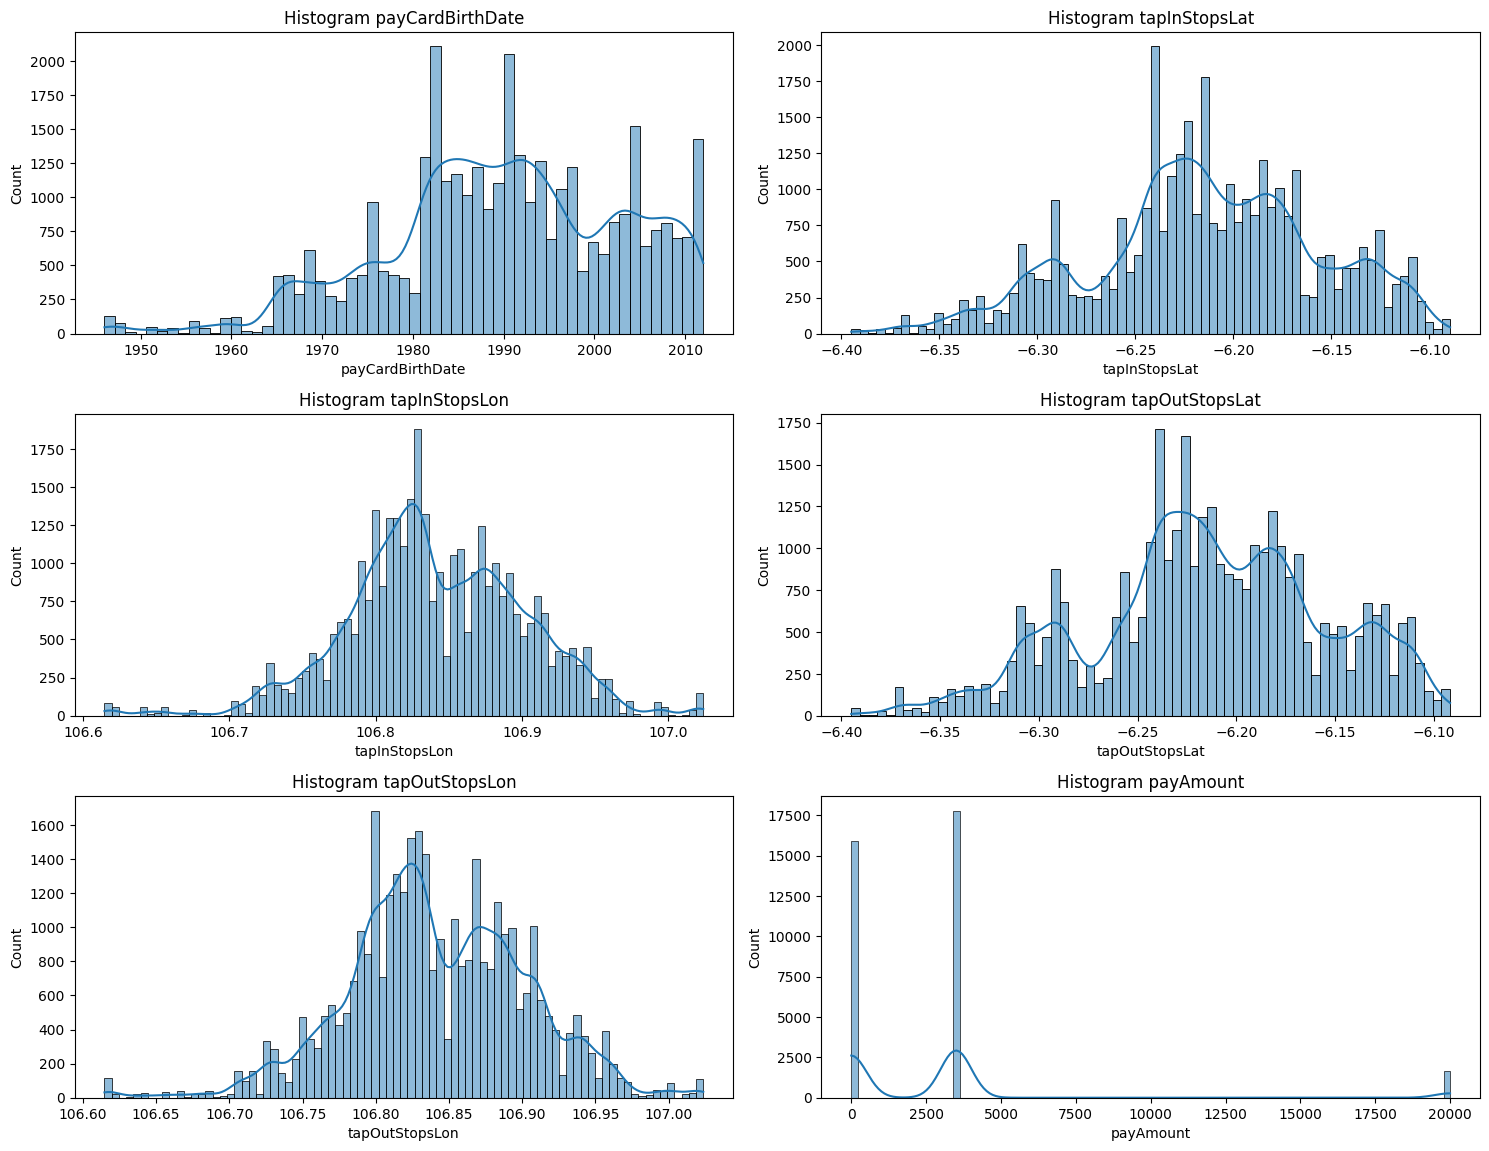

In [207]:
fig = plt.figure(figsize=(15,15))

count = 0
for kolom in numerik.columns:
    count += 1
    plt.subplot(4,2,count)
    sns.histplot(numerik[kolom], kde=True)
    plt.title(f"Histogram {kolom}")
    fig.tight_layout()
plt.show()

Dari Histogram diatas dapat dilihat semua data numerik tidak ada yang memiliki sebaran normal.

Selanjutnya dilakukan uji korelasi untuk melihat hubungan antar variabel atau kolom. Uji korelasi menggunakan metode Spearman karena data tidak terdistribusi normal.

In [208]:
df_corr=df[['payCardBirthDate','tapInStopsLon','tapInStopsLat','tapOutStopsLon','tapOutStopsLat','payAmount']].corr(method = 'spearman')

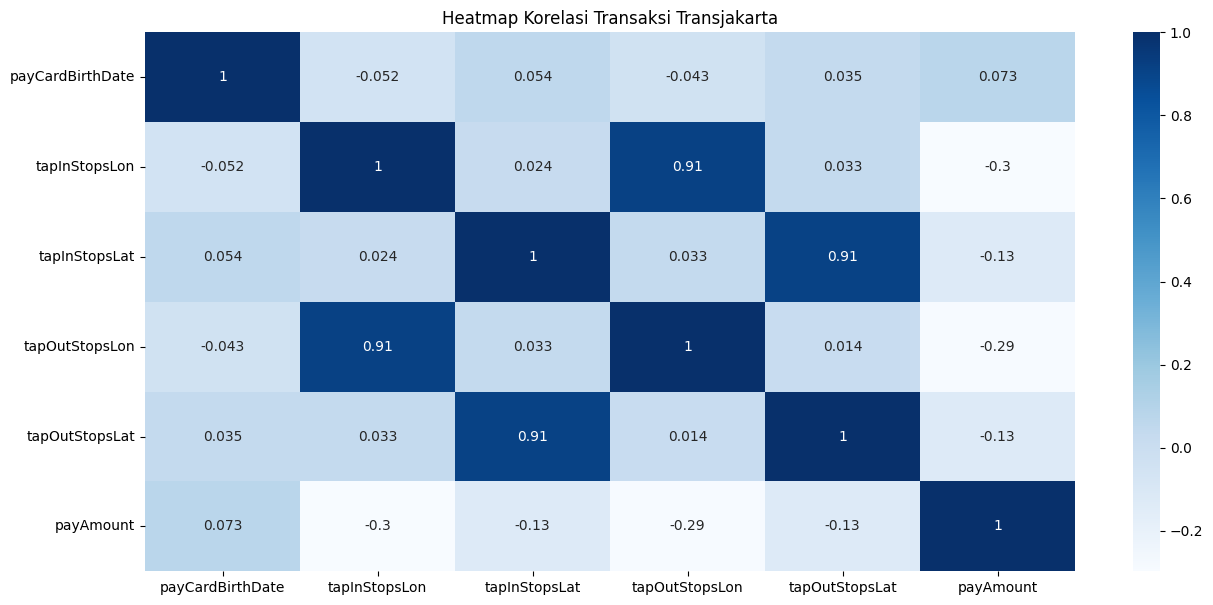

In [209]:
plt.figure(figsize = (15,7))
sns.heatmap(data=df_corr, annot=True, cmap='Blues')
plt.title("Heatmap Korelasi Transaksi Transjakarta")
plt.show()

Dari data, didapatkan hubungan antara `tapInStopsLon` dengan `tapInStopsLat` dan `tapOutStopsLon` dengan `tapOutStopsLat` memiliki hubungan yang kuat (corr = 0.91). Hal ini sesuai dengan interpretasi kolom, dimana mereka adalah pasangan koordinat dari suatu halte saat Tap-in dan Tap-Out

##### **Data Kategorik**

In [210]:
df.describe(include='object').T

,count,unique,top,freq
transID,35301,35301,FMZZ963S4B68ZP,1
payCardID,35301,1975,4885331907664776,40
payCardBank,35301,6,dki,17441
payCardName,35301,1968,Fathonah Saefullah,78
payCardSex,35301,2,F,18778
corridorID,35301,221,1T,384
corridorName,35301,216,Cibubur - Balai Kota,384
direction,35301.0,2.0,1.0,17662.0
tapInStops,35301,2489,P00170,227
tapInStopsName,35301,2488,Penjaringan,227


In [211]:
kategorik = df.select_dtypes(include= 'object')

Cek distribusi data kategorik menggunakan **Barplot**
- jika nilai unik dari suatu kolom lebih dari 10, maka barplot hanya akan menampilkan 10 data terbesar dari tabel tersebut

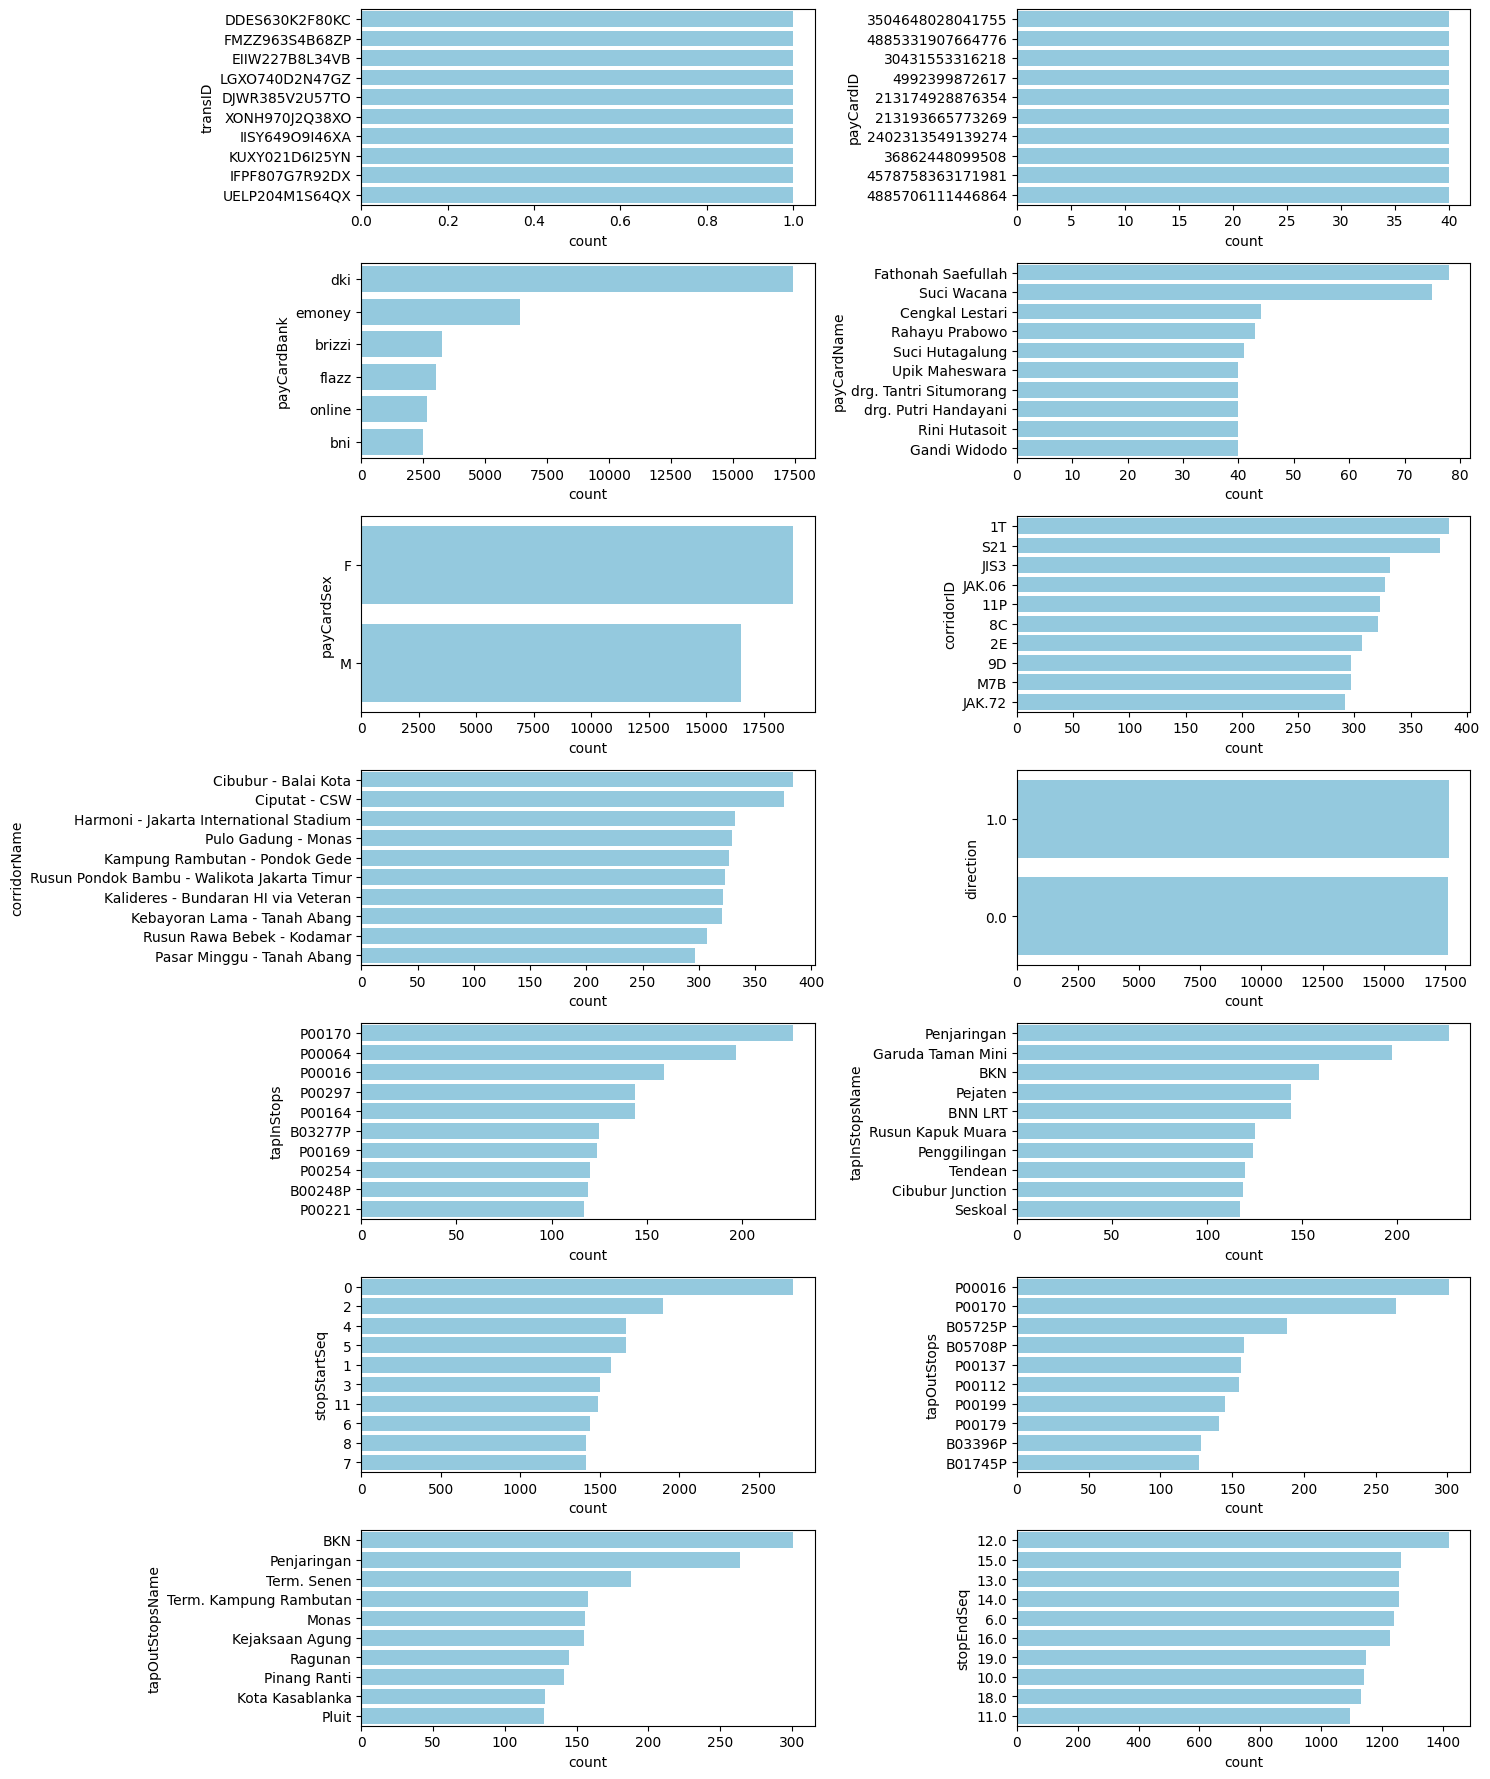

In [212]:
count = 0
fig = plt.figure(figsize=(15,20))
for kolom in kategorik.columns:
    count += 1
    plt.subplot(8,2,count)
    sns.countplot(y = kolom, data = kategorik, order = kategorik[kolom].value_counts().sort_values(ascending = False).head(10).index, color= 'skyblue')
    fig.tight_layout()
plt.show()

dengan menggabungkan tabel analisis deskriptif dan barplot di atas, didapatkan informasi:
- `transID` memiliki data yang unik
- Suatu kartu memiliki paling banyak kemunculan/digunakan 40 kali dalam satu bulan
- Kartu yang paling banyak digunakan saat menaiki Transjakarta adalah bank DKI dengan 17441 kali penggunaan
- Penumpang yang paling banyak menaiki Transjakarta bernama Fathonah Saefullah sebanyak	78 kali
- Perempuan adalah pengguna Transjakarta terbanyak, sebanyak 18778 kali
- Koridor 1T dengan rute Cibubur - Balai Kota memiliki penumpang terbanyak dalam 1 bulan yaitu 384 penumpang
- Penumpang paling banyak melakukan Tap-In di halte Penjaringan dan Tap-Out di halte BKN pada bulan April 2023

## **Data Manipulation**

Menambahkan berbagai kolom data yang dibutuhkan saat proses analisis dilakukan dan mengubah format tipe data pada kolom agar sesuai dan dapat digunakan

### **Usia**

Menambahkan kolom
- `age` usia dengan acuan pada saat tahun 2025 - `payCardBirthDate`
- `ageGroup` pengelompokkan usia menjadi Child, Young Adult, Adult, dan Senior

In [213]:
df['age']= 2025 - df['payCardBirthDate']

def age_group(age):
    if pd.isnull(age):
        return 'Unknown'
    elif age < 18:
        return 'Child'
    elif age < 30:
        return 'Young Adult'
    elif age < 50:
        return 'Adult'
    else:
        return 'Senior'

df['ageGroup'] = df['age'].apply(age_group)

### **Waktu**

Membuat kolom
- `tapInHour` yang berisi jam saat melakukan Tap In
- `dayOfWeek` yang berisi hari saat melakukan Tap In
- `Peak Hour` yang berisi keterangan suatu jam berada dalam rentang morning peak hour, evening peak hour, atau non peak hour


In [214]:
# Hour
df['tapInHour']=df['tapInTime'].dt.hour

# Day
df['dayOfWeek'] = df['tapInTime'].dt.dayofweek

dayOfWeek = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}
df['dayOfWeek'] = df['dayOfWeek'].map(dayOfWeek)

# Peak Hour
def is_peak_trip(row):
    start = row['tapInTime'].hour
    end   = row['tapOutTime'].hour

    if start >= 5  and end <= 9:
        return 'Morning Peak Hour'
    elif start >= 16 and end <= 21:
        return 'Evening Peak Hour'
    else:
        return 'Non Peak Hour'
df['peakHour'] = df.apply(is_peak_trip, axis=1)

Membuat kolom
- `jenisLayanan` yang digunakan yaitu Royal Trans, Transjakarta, atau Jaklingko berdasarkan `corridorID` penumpang
- Rute Royal Trans diambil dari sumber [ini](https://transjakarta.co.id/rute) dan dan [ini](https://busdotid.com/rute-bus-transjakarta-royaltrans-t21-taman-banjar-wijaya-petamburan/)

In [215]:
corridorID_RoyalTrans = ['1T','1K','6P','B13','B14','D31','D32','S31','S12','S14','T21']
# Saat ini koridor T21 sudah tidak beroperasi lagi

conditions = [
    df['corridorID'].str.startswith('JAK.'),
    df['corridorID'].isin(corridorID_RoyalTrans)
]
choices = [
    'JakLingko',
    'RoyalTrans'
]

# default='Transjakarta' akan digunakan untuk semua kasus yang tidak masuk ke kondisi di atas
df['jenisLayanan'] = np.select(conditions, choices, default='Transjakarta')


## **Data Analysis**

**Analisis dilakukan hanya pada penumpang Transjakarta.** Penumpang Royal Trans dan Jaklingko tidak dimasukkan dalam analisis ini.

Jumlah Penumpang per Jenis Layanan

In [216]:
layanan_count = df['jenisLayanan'].value_counts().reset_index()
layanan_count

,jenisLayanan,count
0,Transjakarta,20729
1,JakLingko,12927
2,RoyalTrans,1645


penumpang_gratis adalah penumpang yang mendapat subsidi penuh (payAmount==0)

penumpang_bayar adalah penumpang yang membayar tiket

In [217]:
# Fungsi untuk menghitung total pendapatan dan jumlah penumpang berbayar serta gratis untuk layanan Transjakarta

def total_revenue_transjakarta(kolom_payAmount):
    df_transjakarta = df[df['jenisLayanan'] == 'Transjakarta']
    total_pendapatan = df_transjakarta[kolom_payAmount].sum()
    print(f"💰 Total Pendapatan Layanan Transjakarta: Rp {total_pendapatan:,.0f}")

    return total_pendapatan

## **Kondisi Default (Current)**

Menghitung Total Pendapatan (Current Revenue)

In [218]:
total_all_pendapatan=df['payAmount'].sum()

print(f"💰Total Pendapatan Keseluruhan Saat Ini: Rp {total_all_pendapatan:,.0f}")
print('\nSedangkan untuk layanan Transjakarta saja:')
total_pendapatan_current=total_revenue_transjakarta('payAmount')


💰Total Pendapatan Keseluruhan Saat Ini: Rp 95,140,500

Sedangkan untuk layanan Transjakarta saja:
💰 Total Pendapatan Layanan Transjakarta: Rp 62,240,500


15 Koridor dengan penyumbang Revenue Current terbanyak

In [219]:
df['revenueKoridor']= df.groupby('corridorID')['payAmount'].transform('sum')
df[['corridorID','jenisLayanan','payAmount','revenueKoridor']].drop_duplicates().sort_values(by='revenueKoridor', ascending=False).reset_index(drop=True).head(15)

,corridorID,jenisLayanan,payAmount,revenueKoridor
0,1T,RoyalTrans,20000.0,7680000.0
1,B14,RoyalTrans,20000.0,4380000.0
2,T21,RoyalTrans,20000.0,3520000.0
3,D32,RoyalTrans,20000.0,3460000.0
4,1K,RoyalTrans,20000.0,3140000.0
5,S31,RoyalTrans,20000.0,2900000.0
6,B13,RoyalTrans,20000.0,2500000.0
7,6P,RoyalTrans,20000.0,1840000.0
8,S12,RoyalTrans,20000.0,1780000.0
9,D31,RoyalTrans,20000.0,1700000.0


Proporsi Penumpang Berbayar dan Gratis pada Layanan Transjakarta menggunakan uji Chi-Square Goodness of Fit


In [220]:
# Uji Chi-square Goodness of Fit
H0= 'Proporsi penumpang bayar dan penumpang gratis sama 50% : 50%'
H1= 'Proporsi berbeda signifikan'

# Membuat variabel biner untuk pembayaran
#    1 = membayar tarif , 0 = gratis/subsidi
df['payBinary'] = df['payAmount'].apply(lambda x: 1 if x > 0 else 0)

# Menghitung proporsi masing-masing kategori
prop_table = df[df['jenisLayanan'] == 'Transjakarta']['payBinary'].value_counts(normalize=True)

# Menyiapkan data untuk uji Chi-square Goodness of Fit
df_tj=df[df['jenisLayanan'] == 'Transjakarta']
observed = df[df['jenisLayanan'] == 'Transjakarta']['payBinary'].value_counts().values
expected = [len(df_tj)/2, len(df_tj)/2]

# Melakukan uji Chi-square
chi2_stat, p_value = chisquare(f_obs=observed, f_exp=expected)

print("=== Proporsi Pembayaran Transjakarta ===\n")
print(prop_table)
print("\n=== Hasil Uji Chi-Square Goodness of Fit ===")
print("p-value:", p_value)

if p_value < 0.05:
    print('\nTolak H0\nProporsi penumpang bayar dan gratis berbeda signifikan.\n')
else:
    print('\nGagal Tolak H0\nProporsi penumpang bayar dan gratis sama 50% : 50%.\n')


=== Proporsi Pembayaran Transjakarta ===

payBinary
1    0.85788
0    0.14212
Name: proportion, dtype: float64

=== Hasil Uji Chi-Square Goodness of Fit ===
p-value: 0.0

Tolak H0
Proporsi penumpang bayar dan gratis berbeda signifikan.



Ada perbedaan yang signifikan pada proporsi penumpang bayar (85.79%) dan penumpang gratis (14.21%), yaitu penumpang bayar lebih banyak jumlahnya. Sehingga skenario 1 sampai dengan 4 sangat masuk akal untuk dilakukan karena analisis mengacu pada kelompok penumpang bayar.

## **Skenario 1: Kenaikan Tarif Flat**

payAmount Transjakarta (Flat) yang bernilai 3.500 akan diubah menjadi 5.000 untuk penumpang bayar, nilai ini disimpan dalam kolom `payAmount_sk1`

In [221]:
df['payAmount_sk1'] = df['payAmount']

kondisi = (df['jenisLayanan'] == 'Transjakarta') & (df['payAmount'] == 3500)
df.loc[kondisi, 'payAmount_sk1'] = 5000

In [222]:
# Menghitung Total Pendapatan Transjakarta setelah skenario 1 diterapkan
total_pendapatan_sk1=total_revenue_transjakarta('payAmount_sk1')

💰 Total Pendapatan Layanan Transjakarta: Rp 88,915,000


In [223]:
#Selisih Current Revenue Transjakarta dengan Revenue Skenario 1
print(f'Selisih Pendapatan skenario 1 dengan Current Revenue adalah Rp {total_pendapatan_sk1 - total_pendapatan_current:,.0f}')

# dalam bentuk persentase
persen_selisih_sk1 = ((total_pendapatan_sk1 - total_pendapatan_current) / total_pendapatan_current)
print(f"Persentase Pendapatan Transjakarta pada skenario 1 terhadap Current Revenue adalah: {persen_selisih_sk1:.2%}")

Selisih Pendapatan skenario 1 dengan Current Revenue adalah Rp 26,674,500
Persentase Pendapatan Transjakarta pada skenario 1 terhadap Current Revenue adalah: 42.86%


10 Koridor Transjakarta dengan penyumbang Revenue Skenario 1 terbanyak

In [224]:
df['revenueKoridor_sk1']= df.groupby('corridorID')['payAmount_sk1'].transform('sum')
df[df['jenisLayanan']=='Transjakarta'][['corridorID','jenisLayanan','revenueKoridor_sk1']].drop_duplicates().sort_values(by='revenueKoridor_sk1', ascending=False).reset_index(drop=True).head(15)


,corridorID,jenisLayanan,revenueKoridor_sk1
0,S21,Transjakarta,1880000.0
1,JIS3,Transjakarta,1660000.0
2,8C,Transjakarta,1605000.0
3,9D,Transjakarta,1485000.0
4,M7B,Transjakarta,1485000.0
5,6N,Transjakarta,1450000.0
6,11Q,Transjakarta,1435000.0
7,2,Transjakarta,1360000.0
8,2P,Transjakarta,1290000.0
9,T11,Transjakarta,1275000.0


15 Koridor dengan penyumbang Revenue terbanyak pada skenario 1

In [225]:
df['revenueKoridor_sk1']= df.groupby('corridorID')['payAmount_sk1'].transform('sum')
df[['corridorID','jenisLayanan','revenueKoridor_sk1']].drop_duplicates().sort_values(by='revenueKoridor_sk1', ascending=False).reset_index(drop=True).head(15)

,corridorID,jenisLayanan,revenueKoridor_sk1
0,1T,RoyalTrans,7680000.0
1,B14,RoyalTrans,4380000.0
2,T21,RoyalTrans,3520000.0
3,D32,RoyalTrans,3460000.0
4,1K,RoyalTrans,3140000.0
5,S31,RoyalTrans,2900000.0
6,B13,RoyalTrans,2500000.0
7,S21,Transjakarta,1880000.0
8,6P,RoyalTrans,1840000.0
9,S12,RoyalTrans,1780000.0


Dari Analisis diatas, didapatkan hasil
- Sebelum skenario 1 dijalankan, Revenue Royal Trans menopang total revenue secara keseluruhan yaitu 10 Koridor. Setelahnya dilanjutkan dengan Transjakarta koridor S21, JIS3, 8C, dst.
- Setelah skenario 1 dijalankan, Koridor S21 menyalip Revenue beberapa Royal Trans sebagai Koridor ke-8 yang menyumbang total revenue terbanyak.
- Selisih pendapatan setelah penerapan skenario 1 adalah Rp 26,674,500 yaitu menaikkan Revenue Transjakarta sebesar 42.86%

## Skenario 2 : Kenaikan Tarif berdasarkan Peak Hour

payAmount Transjakarta (Flat) yang bernilai 3.500 akan diubah menjadi 5.000 pada Peak Hour (Morning and Evening Peak Hour)

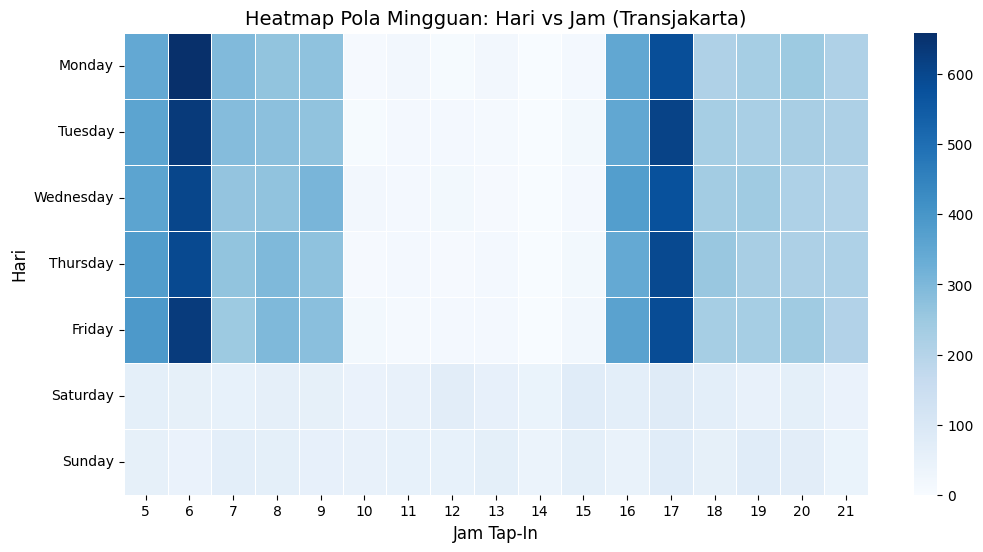

In [226]:
# Membuat Heatmap untuk menetukan peak hour

# Tentukan Urutan Hari
urutan_hari = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_tj['dayOfWeek'] = pd.Categorical(df_tj['dayOfWeek'], categories=urutan_hari, ordered=True)

# Buat Pivot Table
heatmap_data = df_tj.pivot_table(
    index='dayOfWeek',
    columns='tapInHour',
    values='transID',
    aggfunc='count',
    fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='Blues', linewidths=0.5, linecolor='white')

plt.title('Heatmap Pola Mingguan: Hari vs Jam (Transjakarta)', fontsize=14)
plt.xlabel('Jam Tap-In', fontsize=12)
plt.ylabel('Hari', fontsize=12)
plt.yticks(rotation=0)

plt.show()

Berdasarkan heatmap di atas peakHour dibagi ke dalam 3 kategori:
- Jam 5-9 pagi : Morning peak hour
- Jam 16-21 malam : Evening peak hour
- Selain 2 kategori di atas : Non Peak Hour

Pengaturan ini dituliskan dalam section Data Manipulation : Waktu



In [227]:
df['payAmount_sk2'] = df['payAmount']

kondisi = (df['jenisLayanan'] == 'Transjakarta') & (df['payAmount'] == 3500) & (df['peakHour'].isin(['Morning Peak Hour', 'Evening Peak Hour']))
df.loc[kondisi, 'payAmount_sk2'] = 5000


In [228]:
# Menghitung Total Pendapatan Transjakarta setelah skenario 2 diterapkan
total_pendapatan_sk2=total_revenue_transjakarta('payAmount_sk2')

💰 Total Pendapatan Layanan Transjakarta: Rp 83,188,000


In [229]:
#Selisih Current Revenue Transjakarta dengan Revenue Skenario 2
print(f'Selisih Pendapatan skenario 1 dengan Current Revenue adalah Rp {total_pendapatan_sk2 - total_pendapatan_current:,.0f}')

# dalam bentuk persentase
persen_selisih_sk2 = ((total_pendapatan_sk2 - total_pendapatan_current) / total_pendapatan_current)
print(f"Persentase Pendapatan Transjakarta pada skenario 1 terhadap Current Revenue adalah: {persen_selisih_sk2:.2%}")

Selisih Pendapatan skenario 1 dengan Current Revenue adalah Rp 20,947,500
Persentase Pendapatan Transjakarta pada skenario 1 terhadap Current Revenue adalah: 33.66%


10 Koridor Transjakarta dengan Revenue Terbanyak

In [230]:
df['revenueKoridor_sk2']= df.groupby('corridorID')['payAmount_sk2'].transform('sum')
df[df['jenisLayanan']=='Transjakarta'][['corridorID','jenisLayanan','revenueKoridor_sk2']].drop_duplicates().sort_values(by='revenueKoridor_sk2', ascending=False).reset_index(drop=True).head(15)

,corridorID,jenisLayanan,revenueKoridor_sk2
0,S21,Transjakarta,1709000.0
1,JIS3,Transjakarta,1562500.0
2,8C,Transjakarta,1530000.0
3,9D,Transjakarta,1425000.0
4,M7B,Transjakarta,1372500.0
5,6N,Transjakarta,1363000.0
6,11Q,Transjakarta,1336000.0
7,2,Transjakarta,1265500.0
8,6V,Transjakarta,1212000.0
9,12,Transjakarta,1192500.0


In [231]:
# 15 Koridor dengan penyumbang Revenue terbanyak pada skenario 2
df['revenueKoridor_sk2']= df.groupby('corridorID')['payAmount_sk2'].transform('sum')
df[['corridorID','jenisLayanan','revenueKoridor_sk2']].drop_duplicates().sort_values(by='revenueKoridor_sk2', ascending=False).reset_index(drop=True).head(15)

,corridorID,jenisLayanan,revenueKoridor_sk2
0,1T,RoyalTrans,7680000.0
1,B14,RoyalTrans,4380000.0
2,T21,RoyalTrans,3520000.0
3,D32,RoyalTrans,3460000.0
4,1K,RoyalTrans,3140000.0
5,S31,RoyalTrans,2900000.0
6,B13,RoyalTrans,2500000.0
7,6P,RoyalTrans,1840000.0
8,S12,RoyalTrans,1780000.0
9,S21,Transjakarta,1709000.0


Pada saat Peak Hour, kelompok usia manakah yang mendominasi?

In [232]:
peak_hours = ['Morning Peak Hour', 'Evening Peak Hour']
df_peak = df_tj[df_tj['peakHour'].isin(peak_hours)].copy()

# Kategorisasi usia: Produktif vs Non-Produktif
productive_ages = ['Adult', 'Young Adult']
df_peak['Is_Productive'] = df_peak['ageGroup'].isin(productive_ages)

count_productive = df_peak['Is_Productive'].sum()
count_total = len(df_peak)
count_non_productive = count_total - count_productive

print("=== ANALISIS DOMINASI DI JAM SIBUK ===")
print(f"Total Penumpang Peak Hour : {count_total}")
print(f"Jumlah Usia Produktif     : {count_productive} ({count_productive/count_total:.2%})")
print(f"Jumlah Non-Produktif      : {count_non_productive} ({count_non_productive/count_total:.2%})\n")

# walaupun distribusi penumpang tidak normal, karena ukuran sample cukup besar, uji ini bisa dilakukan
# -------------------------------------------------------
# UJI 1: ONE-SAMPLE Z-TEST FOR PROPORTIONS (Parametrik)
# Hipotesis 0: proporsi Produktif <= 50% pada saat Peak hour (p<=0.5)
# Hipotesis alternative: proporsi Produktif > 50% pada saat Peak hour (p>0.5) 'larger'
# -------------------------------------------------------
stat_z, p_z = proportions_ztest(count_productive, count_total, value=0.5, alternative='larger')

print("1. UJI Z-TEST FOR PROPORTION (Parametrik)")
print(f"   Z-Statistic : {stat_z:.4f}")
print(f"   P-Value     : {p_z:.10f}") # P-value sangat kecil artinya sangat signifikan
if p_z < 0.05:
    print("Tolak H0 \nKESIMPULAN: TERBUKTI. Usia Produktif mendominasi secara signifikan (>50%) di jam sibuk.")
else:
    print("tidak Tolak H0 \nKESIMPULAN: Tidak terbukti mendominasi.")

print("\n")

# -------------------------------------------------------
# UJI 2: CHI-SQUARE GOODNESS OF FIT (Non-Parametrik)
# Hipotesis: Apakah sebaran data Produktif vs Non-Produktif merata (50:50)?
# -------------------------------------------------------
observed = [count_productive, count_non_productive]
expected = [count_total/2, count_total/2] # Harapan jika seimbang

chisq_stat, p_chisq = chisquare(f_obs=observed, f_exp=expected)

print("2. UJI CHI-SQUARE GOODNESS OF FIT (Non-Parametrik)")
print(f"   Chi-Square Stat : {chisq_stat:.4f}")
print(f"   P-Value         : {p_chisq:.10f}")
if p_chisq < 0.05:
    print("Tolak H0 \nKESIMPULAN: TERBUKTI. Distribusi penumpang 'Timpang' (Skewed) ")
else:
    print("Terima H0 \nKESIMPULAN: Distribusi merata.")

=== ANALISIS DOMINASI DI JAM SIBUK ===
Total Penumpang Peak Hour : 16274
Jumlah Usia Produktif     : 12260 (75.33%)
Jumlah Non-Produktif      : 4014 (24.67%)

1. UJI Z-TEST FOR PROPORTION (Parametrik)
   Z-Statistic : 74.9767
   P-Value     : 0.0000000000
Tolak H0 
KESIMPULAN: TERBUKTI. Usia Produktif mendominasi secara signifikan (>50%) di jam sibuk.


2. UJI CHI-SQUARE GOODNESS OF FIT (Non-Parametrik)
   Chi-Square Stat : 4178.2301
   P-Value         : 0.0000000000
Tolak H0 
KESIMPULAN: TERBUKTI. Distribusi penumpang 'Timpang' (Skewed) 


Kedua uji statistik di atas menunjukkan hasil bahwa pada saat Peak Hour jumlah usia produktif (Adult dan Young Adult) mendominasi secara signifikan dibandingkan non-produktif.
Informasi ini menjadi landasan adanya kemungkinan mendapatkan Revenue lebih besar jika faktor Peak Hour dengan faktor usia produktif digabungkan (Skenario 4).


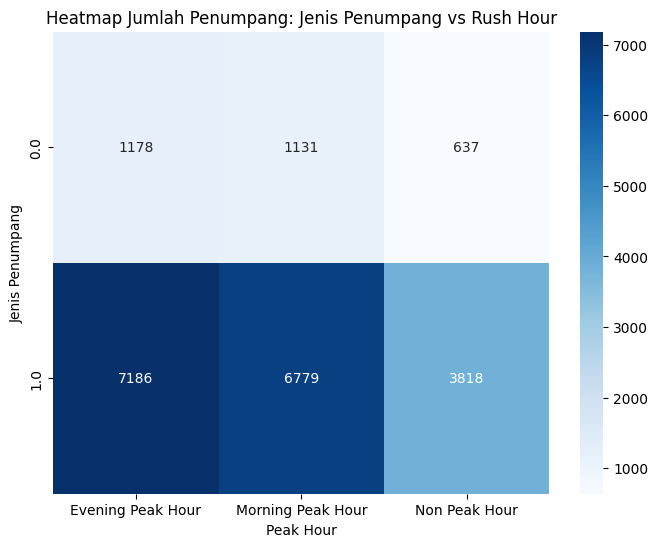

In [233]:
# Membuat Tabel Kontingensi (Crosstab)
df['payBinary'] = df[df['jenisLayanan'] == 'Transjakarta']['payAmount'].apply(lambda x: 1 if x > 0 else 0)
contingency_table = pd.crosstab( df['payBinary'],df['peakHour'])

# Visualisasi Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title('Heatmap Jumlah Penumpang: Jenis Penumpang vs Rush Hour')
plt.ylabel('Jenis Penumpang')
plt.xlabel('Peak Hour')
plt.show()

Dari Analisis Skenario 2, didapatkan hasil
- Setelah skenario 2 dijalankan, Koridor S21 menyalip Revenue Royal Trans sebagai Koridor ke-10 yang menyumbang total revenue terbanyak.
- Selisih pendapatan setelah penerapan skenario 2 adalah Rp 20,947,500 yaitu menaikkan Revenue Transjakarta sebesar 33.66%
- Dari Tabel Top 10 Koridor Transjakarta sebagai Penyumbang Revenue terbanyak diketahui pada saat Rush Hour penumpang bayar lebih banyak di Koridor 9D > M7B, 6V > 2P. Hal ini dapat dilihat dengan membandingkan urutan dengan tabel yang sama pada skenario 1.

### **Skenario 3: Kenaikan Tarif berdasarkan demografi usia penumpang**

payAmount Transjakarta (Flat) yang bernilai 3.500 akan diubah menjadi 5.000 pada saat penumpang berusia Young Adult (18-29) dan Adult (30-49)

In [234]:
df['payAmount_sk3'] = df['payAmount']
productive_ages = ['Adult', 'Young Adult']
kondisi = (df['jenisLayanan'] == 'Transjakarta') & (df['payAmount'] == 3500) & (df['ageGroup'].isin(productive_ages))
df.loc[kondisi, 'payAmount_sk3'] = 5000

In [235]:
total_pendapatan_sk3=total_revenue_transjakarta('payAmount_sk3')

print(f'\nSelisih Pendapatan skenario 3 dengan Current Revenue adalah Rp {total_pendapatan_sk3 - total_pendapatan_current:,.0f}')
# dalam bentuk persentase
persen_selisih_sk3 = ((total_pendapatan_sk3 - total_pendapatan_current) / total_pendapatan_current)
print(f"Persentase Pendapatan skenario 3 terhadap Current Revenue adalah: {persen_selisih_sk3:.2%}")

💰 Total Pendapatan Layanan Transjakarta: Rp 82,336,000

Selisih Pendapatan skenario 3 dengan Current Revenue adalah Rp 20,095,500
Persentase Pendapatan skenario 3 terhadap Current Revenue adalah: 32.29%


In [236]:
df['revenueKoridor_sk3']= df.groupby('corridorID')['payAmount_sk3'].transform('sum')
df[df['jenisLayanan']=='Transjakarta'][['corridorID','jenisLayanan','revenueKoridor_sk3']].drop_duplicates().sort_values(by='revenueKoridor_sk3', ascending=False).reset_index(drop=True).head(15)


,corridorID,jenisLayanan,revenueKoridor_sk3
0,S21,Transjakarta,1755500.0
1,JIS3,Transjakarta,1592500.0
2,8C,Transjakarta,1494000.0
3,11Q,Transjakarta,1430500.0
4,M7B,Transjakarta,1359000.0
5,9D,Transjakarta,1329000.0
6,2,Transjakarta,1303000.0
7,6N,Transjakarta,1279000.0
8,2P,Transjakarta,1212000.0
9,M10,Transjakarta,1171000.0


In [237]:
# 15 Koridor dengan penyumbang Revenue terbanyak pada skenario 2
df['revenueKoridor_sk3']= df.groupby('corridorID')['payAmount_sk3'].transform('sum')
df[['corridorID','jenisLayanan','revenueKoridor_sk3']].drop_duplicates().sort_values(by='revenueKoridor_sk3', ascending=False).reset_index(drop=True).head(15)

,corridorID,jenisLayanan,revenueKoridor_sk3
0,1T,RoyalTrans,7680000.0
1,B14,RoyalTrans,4380000.0
2,T21,RoyalTrans,3520000.0
3,D32,RoyalTrans,3460000.0
4,1K,RoyalTrans,3140000.0
5,S31,RoyalTrans,2900000.0
6,B13,RoyalTrans,2500000.0
7,6P,RoyalTrans,1840000.0
8,S12,RoyalTrans,1780000.0
9,S21,Transjakarta,1755500.0


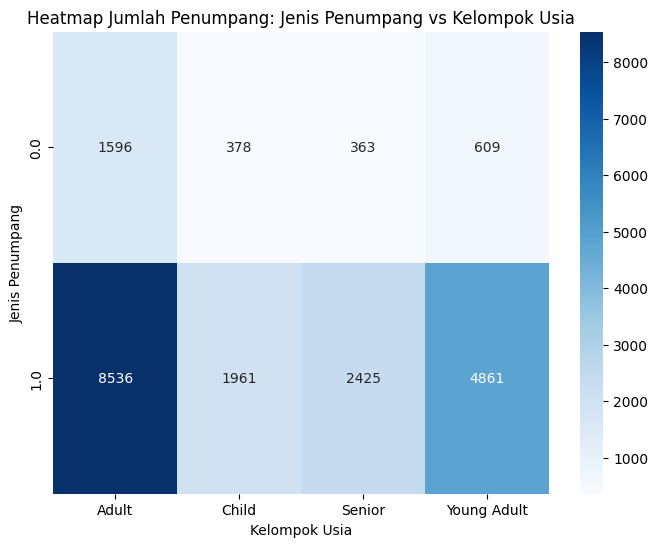

In [238]:
# Membuat Tabel Kontingensi (Crosstab)
df['payBinary'] = df[df['jenisLayanan'] == 'Transjakarta']['payAmount'].apply(lambda x: 1 if x > 0 else 0)
contingency_table = pd.crosstab( df['payBinary'],df['ageGroup'])

# Visualisasi Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title('Heatmap Jumlah Penumpang: Jenis Penumpang vs Kelompok Usia')
plt.ylabel('Jenis Penumpang')
plt.xlabel('Kelompok Usia')
plt.show()

Dari Analisis Skenario 3, didapatkan hasil
- Setelah skenario 3 dijalankan, Koridor S21 menyalip Revenue Royal Trans sebagai Koridor ke-10 yang menyumbang total revenue terbanyak.
- Selisih pendapatan setelah penerapan skenario 3 adalah Rp 20,095,500 yaitu menaikkan Revenue Transjakarta sebesar 32.29%
- Dari Tabel Top 10 Koridor Transjakarta sebagai Penyumbang Revenue terbanyak diketahui usia produktif (young adult dan adult) dari penumpang bayar di Koridor 11Q > M7B , 2 > 6N, M10 > 6V. Hal ini dapat dilihat dengan membandingkan urutan dengan tabel yang sama pada skenario 1.

## Kombinasi Skenario 2 dan 3 : Kenaikan tarif untuk golongan usia Young Adult dan Adult, serta saat Rush Hour secara keseluruhan

payAmount Transjakarta (Flat) yang bernilai 3.500 akan diubah menjadi 5.000 untuk usia Young Adult dan Adult serta pada saat Rush Hour (Morning and Evening Peak Hour) untuk semua usia penumpang bayar

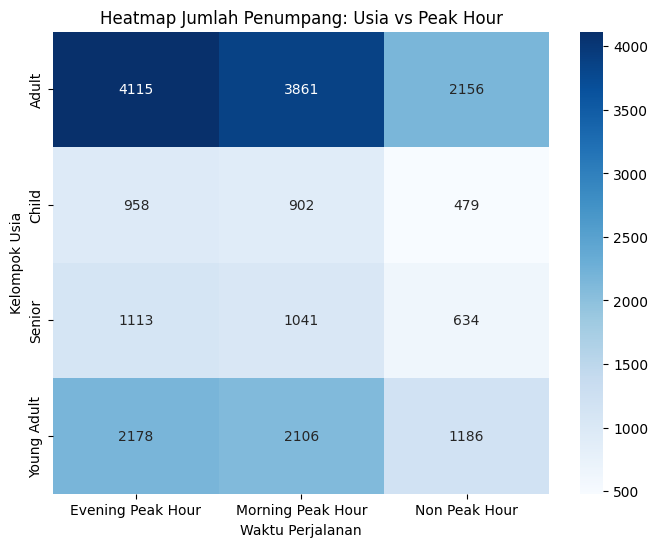

In [239]:
# Membuat Tabel Kontingensi (Crosstab)
contingency_table = pd.crosstab(df_tj['ageGroup'], df_tj['peakHour'])

# Visualisasi Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title('Heatmap Jumlah Penumpang: Usia vs Peak Hour')
plt.ylabel('Kelompok Usia')
plt.xlabel('Waktu Perjalanan')
plt.show()

Heatmap menunjukkan skenario ini sangatlah tepat, karena saat Peak Hour penumpang terkonsentrasi pada usia Young Adult dan Adult

In [240]:
df['payAmount_sk4'] = df['payAmount']
productive_ages = ['Adult', 'Young Adult']
jam_sibuk = ['Morning Peak Hour', 'Evening Peak Hour']
kondisi = (df['jenisLayanan'] == 'Transjakarta') & (df['payAmount'] == 3500) & ((df['ageGroup'].isin(productive_ages)) | (df['peakHour'].isin(jam_sibuk)))
df.loc[kondisi, 'payAmount_sk4'] = 5000

In [241]:
total_pendapatan_sk4=total_revenue_transjakarta('payAmount_sk4')

print(f'\nSelisih Pendapatan skenario 4 dengan Current Revenue adalah Rp {total_pendapatan_sk4 - total_pendapatan_current:,.0f}')
# dalam bentuk persentase
persen_selisih_sk4 = ((total_pendapatan_sk4 - total_pendapatan_current) / total_pendapatan_current)
print(f"Persentase Pendapatan skenario 4 terhadap Current Revenue adalah: {persen_selisih_sk4:.2%}")


💰 Total Pendapatan Layanan Transjakarta: Rp 87,529,000

Selisih Pendapatan skenario 4 dengan Current Revenue adalah Rp 25,288,500
Persentase Pendapatan skenario 4 terhadap Current Revenue adalah: 40.63%


In [242]:
df['revenueKoridor_sk4']= df.groupby('corridorID')['payAmount_sk4'].transform('sum')
df[df['jenisLayanan']=='Transjakarta'][['corridorID','jenisLayanan','revenueKoridor_sk4']].drop_duplicates().sort_values(by='revenueKoridor_sk4', ascending=False).reset_index(drop=True).head(15)


,corridorID,jenisLayanan,revenueKoridor_sk4
0,S21,Transjakarta,1851500.0
1,JIS3,Transjakarta,1645000.0
2,8C,Transjakarta,1572000.0
3,9D,Transjakarta,1483500.0
4,M7B,Transjakarta,1458000.0
5,11Q,Transjakarta,1433500.0
6,6N,Transjakarta,1420000.0
7,2,Transjakarta,1334500.0
8,2P,Transjakarta,1260000.0
9,6V,Transjakarta,1254000.0


In [243]:
# 15 Koridor dengan penyumbang Revenue terbanyak pada skenario 4
df['revenueKoridor_sk4']= df.groupby('corridorID')['payAmount_sk4'].transform('sum')
df[['corridorID','jenisLayanan','revenueKoridor_sk4']].drop_duplicates().sort_values(by='revenueKoridor_sk4', ascending=False).reset_index(drop=True).head(15)

,corridorID,jenisLayanan,revenueKoridor_sk4
0,1T,RoyalTrans,7680000.0
1,B14,RoyalTrans,4380000.0
2,T21,RoyalTrans,3520000.0
3,D32,RoyalTrans,3460000.0
4,1K,RoyalTrans,3140000.0
5,S31,RoyalTrans,2900000.0
6,B13,RoyalTrans,2500000.0
7,S21,Transjakarta,1851500.0
8,6P,RoyalTrans,1840000.0
9,S12,RoyalTrans,1780000.0


Dari Analisis gabungan di atas, didapatkan hasil
- Setelah gabungan skenario 2 dan 3 dijalankan, Koridor S21 menyalip Revenue beberapa Royal Trans sebagai Koridor ke-8 yang menyumbang total revenue terbanyak.
- Selisih pendapatan setelah penerapan skenario 4 adalah Rp 25,288,500 yaitu menaikkan Revenue Transjakarta sebesar 40.63%

## **Simpulan dan Rekomendasi**

- Dari keempat skenario yang dilakukan, semuanya menaikkan revenue Transjakarta cukup banyak, yaitu
  - Skenario 1 : 42.86%
  - Skenario 2 : 33.66%
  - Skenario 3 : 32.29%
  - Skenario 4 : 40.63%

- Kenaikan tarif saat Peak Hour sudah dilakukan dalam transportasi umum lain, yaitu LRT. Sehingga skenario ini merupakan salah satu yang dapat dipertimbangkan, karena masyarakat akan lebih mudah menerima perubahan melalui skenario yang sudah pernah dilakukan sebelumnya.
- Kelompok usia produktif menggantungkan aktifitas sehari-hari nya melalui Transjakarta, sehingga selama kenaikan tarif yang dilakukan masih dalam rentang yang wajar mereka akan tetap menggunakan transportasi umum ini.

- Skenario 1 merupakan langkah terbaik jika ingin meningkatkan revenue secara maksimal. Namun kenaikan tarif angkutan umum ini berkaitan erat dengan kehidupan masyarakat sehingga akan menimbulkan sentimen yang kuat juga.
- Skenario 4 merupakan langkah terbaik jika ingin meningkatkan revenue dan menjaga sentimen atau reaksi masyarakat terhadap keputusan kenaikan tarif ini.

In [244]:
file_name = 'Transjakarta_analisis.xlsx'
df.to_excel(file_name, index=False)